# New year effect of Chinese stock market

###   New year effect of Chinese stock market basically refers to small stocks, which have showed a remarkable increase during the month of Chinese new year. In this report, we analyse three equity indices in order to show the New year effect of Chinese stock.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set()
from scipy import stats
plt.rcParams['figure.figsize'] = [15, 5]
import pyfolio as pf

equity_index=pd.read_csv('equity_index_close.csv', index_col=0, parse_dates=True)

D:\anaconda\lib\site-packages\empyrical\utils.py:32: UserWarning: Unable to import pandas_datareader. Suppressing import error and continuing. All data reading functionality will raise errors; but has been deprecated and will be removed in a later version.
  warnings.warn(msg)


In [2]:
chinese_new_year = pd.to_datetime(['2007-2-18', '2008-2-7', '2009-1-26', '2010-2-14', '2011-2-3', '2012-1-23', '2013-2-10', '2014-1-31', '2015-2-19', '2016-2-8', '2017-1-28', '2018-2-16'])
chinese_new_year

DatetimeIndex(['2007-02-18', '2008-02-07', '2009-01-26', '2010-02-14',
               '2011-02-03', '2012-01-23', '2013-02-10', '2014-01-31',
               '2015-02-19', '2016-02-08', '2017-01-28', '2018-02-16'],
              dtype='datetime64[ns]', freq=None)

In [3]:
plt.rcParams['figure.figsize'] = [15, 5]

In [4]:
# The difference between two index. Such as CSI300 minus SSE50 means taking the long position of CSI300 and short position of SSE50.
def subtract_index(equity_index_ret):
    equity_index_ret['CSI300-SSE50'] = equity_index_ret['CSI300.INDX'] - equity_index_ret['SSE50.INDX']
    equity_index_ret['CSI500-CSI300'] = -equity_index_ret['CSI300.INDX'] + equity_index_ret['CSI500.INDX']
    equity_index_ret['CSI500-SSE50'] = -equity_index_ret['SSE50.INDX'] + equity_index_ret['CSI500.INDX']
    equity_index_ret['CSI300+CSI500-2*SSE50'] = equity_index_ret['CSI300.INDX'] + equity_index_ret['CSI500.INDX'] - equity_index_ret['SSE50.INDX']
    return equity_index_ret

In [82]:
def calculateSR(ret):
    ret = ret.dropna()
    ret_mean = stats.mstats.gmean(1+ret)-1
    ret_std = ret.std()
    sr = ret_mean/ret_std*np.sqrt(252)
    
    return sr

In [6]:
# Calculate the daily return 
equity_index_daily_ret = equity_index.pct_change().dropna(how='all')
equity_index_daily_ret = subtract_index(equity_index_daily_ret)

In [7]:
# Calculate the monthly return 
equity_index_monthly=equity_index.resample('M').last()
equity_index_monthly_ret = equity_index_monthly.pct_change().dropna(how='all')
equity_index_monthly_ret = subtract_index(equity_index_monthly_ret)

In [8]:
# Calculate the monthly return by aggregating all years from 2007 to 2018.
def cal_mean(equity_index_monthly_ret):
    monthly_ret = pd.DataFrame(0, index=range(1, 13), columns=equity_index_monthly_ret.columns)
    count_month = pd.DataFrame(0, index=range(1, 13), columns=equity_index_monthly_ret.columns)
    for date in equity_index_monthly_ret.index:
        get_month = date.month
# Count the existence times for each month
        count_month.loc[get_month] = count_month.loc[get_month] + 1
        monthly_ret.loc[get_month] = monthly_ret.loc[get_month] + equity_index_monthly_ret.loc[date]
    monthly_ret = monthly_ret / count_month
    return monthly_ret
monthly_ret = cal_mean(equity_index_monthly_ret)

### The following graph shows the monthly return of twelve months.

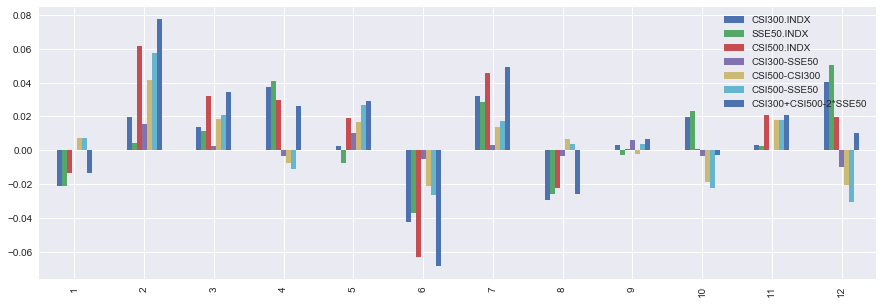

In [9]:
monthly_ret.iloc[:, :].plot(kind='bar')

### For CSI500 and its differences with other two index, the returns in February outperform other months. Since spring festival occurs around February, we roughly guess that this unsual pattern is due to the coming of new year.
### However, the aggregation may cause some problems since one year may greatly out-perform others and have a strong impact on the whole result. Thus it will be necessary to look through each year to find whether February is really a special month.

In [10]:
# Each year's february return, we obtain this by calculate the mean of daily return in february
february_ret_daily = equity_index_daily_ret.iloc[equity_index_daily_ret.index.month == 2]
february_ret = february_ret_daily.resample('A').apply(calculateSR)
february_ret.index = range(2007, 2019)
february_ret.index.name = 'year'
february_ret

,CSI300.INDX,SSE50.INDX,CSI500.INDX,CSI300-SSE50,CSI500-CSI300,CSI500-SSE50,CSI300+CSI500-2*SSE50
year,,,,,,,
2007,2.037828,0.621216,5.387691,9.054371,8.768769,9.296176,6.829563
2008,0.393987,-0.248890,2.799550,3.282909,5.481762,4.952115,3.308547
2009,1.452271,1.000702,1.704050,1.569485,1.573647,1.559970,1.747108
2010,1.983836,1.064468,5.282309,3.742783,4.355004,4.307818,5.431429
2011,3.827965,2.226402,7.907415,7.258829,8.800653,9.316605,8.441833
2012,4.436273,2.761686,7.829757,6.777609,7.619568,7.562631,8.713804
2013,-0.335652,-1.035056,2.940938,2.367682,4.393952,3.835842,3.563594
2014,-0.807192,-0.674521,1.400545,-0.385870,3.449083,2.128043,0.981241
2015,2.859883,1.783546,6.426455,2.370329,2.822183,2.718177,6.193289


In [11]:
# Each year's return excluding february
ret_without_feb_daily = equity_index_daily_ret.iloc[equity_index_daily_ret.index.month != 2]
ret_without_feb = ret_without_feb_daily.resample('A').apply(calculateSR)
ret_without_feb.index = range(2007, 2019)
ret_without_feb.index.name = 'year'
ret_without_feb

,CSI300.INDX,SSE50.INDX,CSI500.INDX,CSI300-SSE50,CSI500-CSI300,CSI500-SSE50,CSI300+CSI500-2*SSE50
year,,,,,,,
2007,2.549595,2.493170,2.111019,0.432574,-0.157702,-0.007979,1.883872
2008,-2.447828,-2.466324,-2.008271,0.146002,0.513657,0.354116,-1.887168
2009,2.236587,2.040876,2.565275,0.647262,1.110908,0.946170,2.416376
2010,-0.687209,-1.194951,0.144929,1.645115,1.383655,1.482514,0.439637
2011,-1.822523,-1.246196,-2.323816,-2.242115,-1.899586,-2.161225,-2.544180
2012,0.033899,0.552043,-0.510734,-2.185910,-1.344383,-1.736206,-0.837334
2013,-0.381507,-0.669537,0.583168,1.060081,1.771254,1.532904,0.805344
2014,2.456296,2.448550,1.757172,-1.255443,-0.969889,-1.145241,1.042263
2015,0.040456,-0.248893,0.700233,0.709720,1.240280,0.994884,0.694795


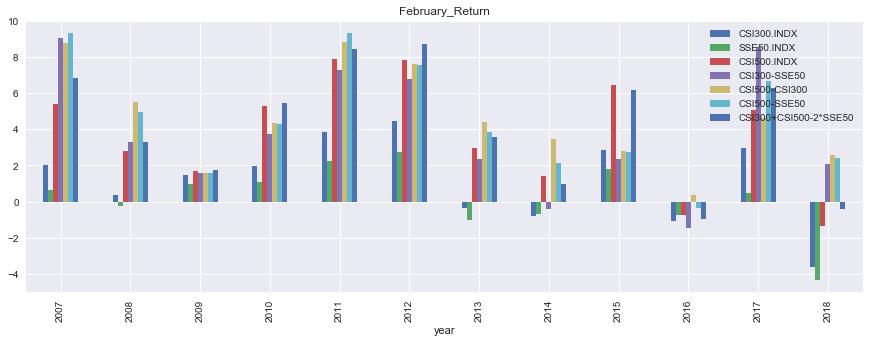

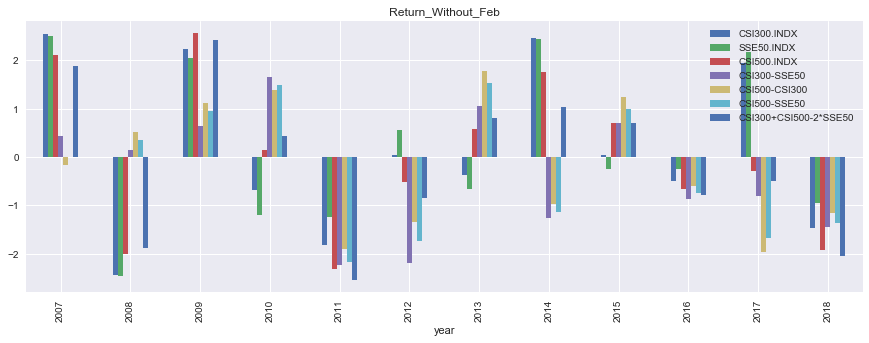

In [12]:
# Draw the diagram to compare february with other months
february_ret.plot(kind='bar', title='February_Return')
ret_without_feb.plot(kind='bar', title='Return_Without_Feb')

### The above diagrams show that for CSI500, only two years among twelve suffer from value decrease, while for CSI500 minus CSI300, all years enjoy positive return in February. But the return over other months displays an irregular pattern of gain and loss.

### We also draw another graph to compare the return between February and other months.

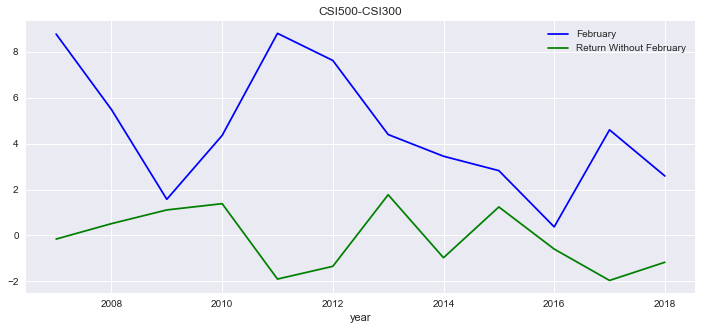

In [13]:
plt.figure(figsize=(12,5))
def compare2(february_ret, ret_without_feb, index_name):
    ax1 = february_ret[index_name].plot(color='blue', grid=True, label='February')
    ax2 = ret_without_feb[index_name].plot(color='green', grid=True, label='Return Without February')
    ax1.legend()
    plt.title(index_name)
    plt.show()
    return None
compare2(february_ret, ret_without_feb, 'CSI500-CSI300')

### The blue line represents return in February, while the gree line represents return without February.  Here we look into CSI500 minus CSI300. The blue line lies above the green line, indicating the outstanding performance of February among other months. 

### Additionaly, we do a t-test to quantitively show the difference between February and other months.

In [14]:
def highlight_value_larger_than(s, a):
    return 'background-color: pink' if s>=a else ''
def highlight_value_smaller_than(s, a):
    return 'background-color: pink' if s<=a else ''
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
def highlight_min(s):
    '''
    highlight the minimum in a Series yellow.
    '''
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [15]:
result = stats.ttest_ind(february_ret, ret_without_feb, equal_var=False)
result_table = pd.DataFrame([result[0], result[1]])
style = pd.DataFrame('', index = ['t-value', 'p-value'], columns = ret_without_feb.columns)
result_table.index = ['t-value', 'p-value']
result_table.columns = ret_without_feb.columns

result_table.style.\
    applymap(lambda x: highlight_value_larger_than(x, 2), subset=pd.IndexSlice['t-value', :]).\
    applymap(lambda x: highlight_value_smaller_than(x, 0.05), subset=pd.IndexSlice['p-value', :]).\
    apply(highlight_max, subset=pd.IndexSlice['t-value', :], axis = 1).\
    apply(highlight_min, subset=pd.IndexSlice['p-value', :], axis = 1)
# Mark the t-value larger than 2 pink
# Mark the p-value smaller than 0.05 pink
# Mark the maximum of t-value yellow
# Mark the minimum of p-value yellow

,CSI300.INDX,SSE50.INDX,CSI500.INDX,CSI300-SSE50,CSI500-CSI300,CSI500-SSE50,CSI300+CSI500-2*SSE50
t-value,1.20772,0.0217703,3.68831,3.90519,5.44131,4.9516,4.05005
p-value,0.240998,0.98283,0.00188124,0.00156729,5.35541e-05,0.000175028,0.000955583


### T-value of CSI500-CSI300 is 5.44, and p-value is 0.00005. 

### On the one hand, February outperforms others except for larger indices CSI300 and SSE50.On the other hand, CSI500 minus CSI300 outperforms others indices.

### Because the date of Chinese new year varies across different years, to be rigorous, we should discuss time periods according to the specific date of Chinese new year rather than just February. Suppose we buy index futures m days before Chinese new year, and hold for n days(the days here all refer to trading days). The daily return of this period could be obtained by the following functions.

In [16]:
# List the date of chinese new year from 2007 to 2018
chinese_new_year = pd.to_datetime(['2007-2-18', '2008-2-7', '2009-1-26', '2010-2-14', '2011-2-3', '2012-1-23', '2013-2-10', '2014-1-31', '2015-2-19', '2016-2-8', '2017-1-28', '2018-2-16'])

In [17]:
def ret_after_newyear(chinese_new_year, equity_index, shift, holding_day): 
    ret_after_newyear_df = pd.DataFrame()
    for new_year_day in chinese_new_year:
# Loop over cny dates from 2007 to 2018
        first_trading_day_after_cny = equity_index.loc[new_year_day:].index[0]
        designated_index = equity_index.index[equity_index.index.get_loc(first_trading_day_after_cny)+shift]
# The start day, shifting from the first trading day after cny
        last_day_index = equity_index.index[equity_index.index.get_loc(first_trading_day_after_cny)+shift+holding_day]
# The end day
        this_year = equity_index.loc[designated_index:last_day_index].pct_change().dropna()
# Daily return during the holding time
        ret_after_newyear_df = pd.concat([ret_after_newyear_df, this_year], sort=False)
        ret_after_newyear_df = subtract_index(ret_after_newyear_df)
    return ret_after_newyear_df

### We choose an arbitrary combination of start day and holding days, like -5, and 10. And compare the result with those obtained in previous sections

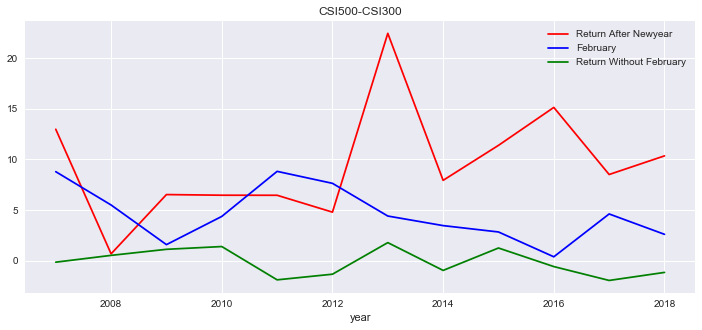

,CSI300.INDX,SSE50.INDX,CSI500.INDX,CSI300-SSE50,CSI500-CSI300,CSI500-SSE50,CSI300+CSI500-2*SSE50
year,,,,,,,
2007,-0.165033,-1.254855,2.874103,9.711996,12.953153,12.515746,3.877387
2008,2.029544,1.789987,2.111759,0.903313,0.665373,0.673350,2.090844
2009,13.222075,12.180827,13.224770,4.986564,6.511288,5.989894,12.255112
2010,9.137628,6.406988,16.497317,4.962770,6.447660,6.089938,15.640782
2011,11.282923,7.483389,18.971368,11.203410,6.442148,8.623029,20.411696
2012,5.015819,4.583413,6.644800,2.930477,4.778373,4.379800,6.690349
2013,-6.340954,-10.246612,3.440706,12.214490,22.414687,21.657500,6.601455
2014,3.226032,3.119009,7.569980,0.247935,7.915178,5.285679,5.987896
2015,3.240933,-0.712452,19.958296,15.789605,11.365776,12.767743,23.794109


In [128]:
# Start from five days before the Chinese new year, and hold for ten days
ret_after_newyear_daily = ret_after_newyear(chinese_new_year, equity_index, -5, 10)
# Calculate the mean daily return for each year
ret_after_newyear_df = ret_after_newyear_daily.resample('A').apply(calculateSR)
ret_after_newyear_df.index = range(2007, 2019)
ret_after_newyear_df.index.name = 'year'

plt.figure(figsize=(12,5))
def compare3(ret_after_newyear_df, february_ret, ret_without_feb, index_name):
    ax3 = ret_after_newyear_df[index_name].plot(color='red', grid=True, label='Return After Newyear')
    ax1 = february_ret[index_name].plot(color='blue', grid=True, label='February')
    ax2 = ret_without_feb[index_name].plot(color='green', grid=True, label='Return Without February')
    ax1.legend()
    plt.title(index_name)
    plt.show()
    return None
compare3(ret_after_newyear_df, february_ret, ret_without_feb, 'CSI500-CSI300')
ret_after_newyear_df

In [19]:
# Do t-test to compare the result obtained from last two sections
result = stats.ttest_ind(ret_after_newyear_df, february_ret, equal_var=False)
result_table = pd.DataFrame([result[0], result[1]])
style = pd.DataFrame('', index = ['t-value', 'p-value'], columns = february_ret.columns)
result_table.index = ['t-value', 'p-value']
result_table.columns = ret_without_feb.columns

result_table.style.\
    applymap(lambda x: highlight_value_larger_than(x, 2), subset=pd.IndexSlice['t-value', :]).\
    applymap(lambda x: highlight_value_smaller_than(x, 0.05), subset=pd.IndexSlice['p-value', :]).\
    apply(highlight_max, subset=pd.IndexSlice['t-value', :], axis = 1).\
    apply(highlight_min, subset=pd.IndexSlice['p-value', :], axis = 1)

,CSI300.INDX,SSE50.INDX,CSI500.INDX,CSI300-SSE50,CSI500-CSI300,CSI500-SSE50,CSI300+CSI500-2*SSE50
t-value,2.09203,1.38886,3.12351,2.08161,2.717,2.54817,3.07869
p-value,0.0540145,0.187649,0.00658374,0.0503423,0.0153197,0.0204764,0.00719072


### Returns after Chinese new year is much larger than returns in February in most years. However, the case will depend on the choice of start time and the length of holdings days. Inversely, by looking into different choices, we could find the most suitable time to buy or sell so that we maximize our profits.

In [42]:
# We choose earliest start day before Chinese new year to be 5
start_day_choice = np.array([-5, -4, -3, -2, -1])
# The maximum holding time would be four weeks, that is 20 work days
investing_time_choice = np.array([5, 10, 15, 20])
multiindex = pd.MultiIndex.from_product([investing_time_choice, staring_day_choice])
cny_return = pd.DataFrame(0, index=multiindex, columns=ret_after_newyear_df.columns)
cny_return.index.names = ['investing_time', 'start_day']

### Note that the evaluation of a strategy should take both return and risk into account. For a given year, the prizes fluctuate from day to day, adding up the uncertainty to our strategies. For different years , returns from the same strategy vary. 

In [79]:
# Calculate the expected return of a strategy and divide it by the risk
def calculate_ret(ret_daily):
    return ((ret_daily+1).prod()-1)/ret_daily.std()

In [100]:
for investing_time in investing_time_choice:
    for start_day in start_day_choice:
        # For each pair of choice we calculate the return/risk ratio
        ret_after_newyear_daily = ret_after_newyear(chinese_new_year, equity_index, start_day, investing_time)
        ret_after_newyear_df = ret_after_newyear_daily.resample('A').apply(calculate_ret)
        # We take average over ifferent years and then divide the result by risk
        cny_return.loc[investing_time, start_day] = ret_after_newyear_df.mean()/ret_after_newyear_df.std()

In [101]:
# We use gradient colors to demonstrate how much profit a strategy would bring. Darker background means that it would enjoy more return or less risk
from matplotlib import colors
def background_gradient(s, m, M, cmap='PuBu', low=0, high=0):
    rng = M - m
    norm = colors.Normalize(m - (rng * low),
                            M + (rng * high))
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

s = cny_return.style.apply(background_gradient,
               cmap='PuBu',
               m=df.min().min(),
               M=df.max().max(),
               low=0,
               high=0.2)
s

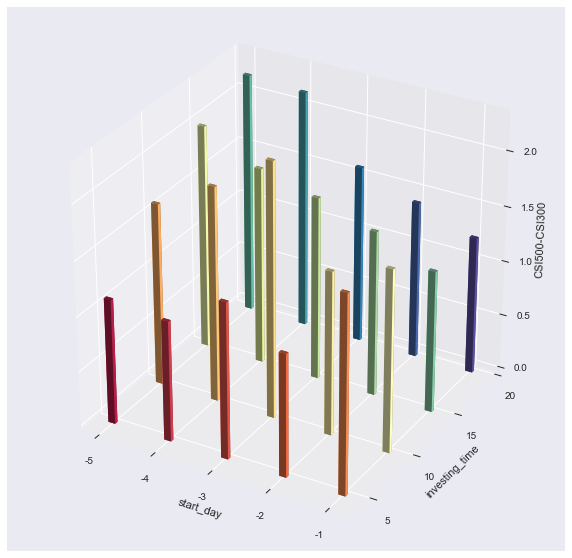

In [120]:
# The following histogram also shows the result of different strategies. 
from mpl_toolkits.mplot3d import axes3d
L = []
for i, group in cny_return.groupby(level=0)['CSI500-CSI300']:
    L.append(group.values)
z = np.hstack(L).ravel()
# Letting the labels on both the x and y dimensions take unique values of the respective levels of the Multi-Index Dataframe. The x and y dimensions then take the range of these values.

xlabels = cny_return.index.get_level_values('start_day').unique()
ylabels = cny_return.index.get_level_values('investing_time').unique()
x = np.arange(xlabels.shape[0])
y = np.arange(ylabels.shape[0])
# Returning coordinate matrices from coordinate vectors using np.meshgrid

x_M, y_M = np.meshgrid(x, y, copy=False)
# 3-D plotting:

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Making the intervals in the axes match with their respective entries
ax.w_xaxis.set_ticks(x)
ax.w_yaxis.set_ticks(y+0.2)

# Renaming the ticks as they were before
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticklabels(ylabels)

# Labeling the 3 dimensions
ax.set_xlabel('start_day')
ax.set_ylabel('investing_time')
ax.set_zlabel('CSI500-CSI300')

# Choosing the range of values to be extended in the set colormap
values = np.linspace(0.05, 1, x_M.ravel().shape[0])

# Selecting an appropriate colormap
colors = plt.cm.Spectral(values)
ax.bar3d(x_M.ravel(), y_M.ravel(), z*0, dx=0.12, dy=0.05, dz=z, color=colors)

plt.show()

### For CSI500 minus CSI300, starting from three days before new year and holding the spread for two weeks would be most beneficial, which return an average rate of 4.5% each year. Although starting from four or five days before and holding for four weeks would also bring similar amount of profits-an average of 5.7% increment each year, longer investing time would be riskful and time-wasting. Therefore, (-3, 10) is the best strategy for now.

In [136]:
ret_after_newyear_daily = ret_after_newyear(chinese_new_year, equity_index, -3, 10)
ret_after_newyear_df2 = ret_after_newyear_daily.resample('A').apply(lambda x: ((x+1).prod()-1))
ret_after_newyear_df2['CSI500-CSI300']

Trading_Day
2007-12-31    0.058599
2008-12-31    0.095765
2009-12-31    0.040448
2010-12-31    0.050201
2011-12-31    0.026916
2012-12-31    0.018899
2013-12-31    0.066518
2014-12-31    0.056575
2015-12-31    0.059432
2016-12-31    0.033271
2017-12-31    0.012497
2018-12-31    0.029905
Freq: A-DEC, Name: CSI500-CSI300, dtype: float64

In [137]:
ret_after_newyear_df2['CSI500-CSI300'].mean()

0.04575215674753306